![alt text](iSalud_Covecare.png 'Logo')

Este notebook se realizó tomando como base:
- https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution
- https://www.kaggle.com/sulianova/eda-cardiovascular-data

Algunos enlaces interesantes:
- [pd.melt - Documentación](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
- [Galería de Seaborn](https://seaborn.pydata.org/examples/index.html)
- [Tutorial oficial de Seaborn](https://seaborn.pydata.org/tutorial.html)
- [What’s Tidy Data? How to organize messy datasets in Python with Melt and Pivotable functions](https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9)

## EDA de datos de enfermedades cardiovasculares

El dataset contiene 70.000 registros de pacientes en 12 variables o _features_ (edad, sexo, systolic blood pressure, diastolic blood pressure, and etc). La clase "cardio" toma el valor 1 cuando el paciente tuvo una enfermedad cardiovascular y 0 si el paciente es saludable.

#### Descripción de los datos

Hay 3 tipos de variablesut features:

- *Objetivas*: factual information;
- *caracteristica de examen*: results of medical examination;
- *subjetivas*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Analisis inicial

In [1]:
import pandas as pd  #importamos el modulo pandas, y lo vamos a llamar pd
import seaborn as sns  # importamos el modulo seaborn, y lo llamamos sns
from matplotlib import pyplot as plt

In [2]:
# Leemos el dataset llamado cardio_train, e indicamos que la separación de los datos se hace con ;
df = pd.read_csv(
    "https://github.com/matog/iSalud-IntroCienciaDeDatos/raw/main/cardio_train.zip", sep=";")  

In [3]:
df.shape

(70000, 13)

In [4]:
df.shape[1] # Como shape tiene dos argumentos, podemos imprimir cada uno indicando la posición

13

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Análisis univariado
Para comenzar a entender los datos, primero necesitamos saber que tipo de datos son. Esto se realiza con la función `info()`:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Todas las variables o _features_ son numéricas, 12 _integers_ y 1 decimal (weight). La segunda columna nos da una idea del tamaño del dataset y cuantas observaciones no contienen valores nulos. Podemos utilizar `describe()` para mostrar algunas estadísticas como `min`, `max`, `mean`,`std` para cada variable (numérica):

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Nan Values - Valores nulos


Verificamos la cantidad de valores nulos que tiene le DF


In [8]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Como muestra la salida anterior, no hay valores nulos en el DF. Pero para hacer mas interesante la práctica, vamos a reemplazar algunos valores de la columna `height`, seleccionados al azar, por `na`

In [16]:
import random
import numpy as np

#generamos una list con las posiciones donde vamos a reemplazar el valor existente por un NaN
random.seed(3)
null_values = random.sample(range(df.shape[0]), 7)

In [17]:
null_values

[31190, 17094, 48490, 62135, 8588, 1725, 61503]

In [21]:
df.loc[df.index.isin(null_values),'height'] = np.nan

In [22]:
df['height'].isna().sum()

7

In [23]:
df.loc[df['height'].isna()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1725,2441,18399,1,NaN,71.0,120,70,1,1,0,0,1,0
8588,12257,15514,1,NaN,65.0,120,70,1,1,0,0,0,0
17094,24426,16177,1,NaN,80.0,140,90,1,1,0,0,1,1
31190,44531,21934,1,NaN,78.0,130,80,1,1,0,0,1,0
48490,69238,21718,1,NaN,66.0,120,80,1,1,0,0,1,1
61503,87816,17375,1,NaN,110.0,110,60,1,3,0,0,0,0
62135,88725,21243,1,NaN,68.0,120,80,1,1,0,0,1,1


Reemplazamos los valores `nan` por el promedio de la columna `height`

In [24]:
height_mean = df['height'].mean()

In [25]:
height_mean

164.35980740931237

In [26]:
df.loc[df['height'].isna(),'height'] = height_mean

In [32]:
# Verificamos que el reemplazo haya sido exitoso
df.loc[df.index==61503]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
61503,87816,17375,1,164.36,110.00,110,60,1,3,0,0,0,0


In [30]:
pd.options.display.float_format = "{:,.2f}".format # Convertimos todos los float a dos decimales

#### Reenombramos columnas

In [ ]:
# df.rename(columns={
#     "age": "edad",
#     "gender": "sexo",
#     "height": "altura",
#     "weight": "peso",
#     "ap_hi":"sistolica",
#     "ap_lo":"diastolica",
#     "cholesterol":"colesterol",
#     "gluc":"glucosa",
#     "smoke":"fumador",
#     "alco":"alcohol",
#     "active":"actividad_fisica",
#     "cardio":"cardiaco",
# }, inplace = True)

Convertimos `age`, expresada en dias, en años.

In [33]:
df['age_year'] = round(df['age']/365)

In [34]:
df.to_csv('cardio_train_fixed.csv', index = False)

#### Asignacion de valores desde un dict 

Se generan nuevas variables _new_ porque si reescribimos la columna original genera problema para los gráficos cuanti porque cambia los tipo de valores de la columna

Asignamos valores desde un diccionario a las escalas

In [35]:
# primero definimos las nuevas columnas

df['cholesterol_new'] = df['cholesterol']
df['gluc_new'] = df['gluc']
df['smoke_new'] = df['smoke']
df['alco_new'] = df['alco']
df['active_new'] = df['active']
df['cardio_new'] = df['cardio']

In [36]:
col_cg = ['cholesterol_new', 'gluc_new']
dict_cg = {1: 'normal', 2: 'above normal', 3: 'well above normal'}

col_saa = ['smoke_new', 'alco_new', 'active_new']
dict_saa = {0:'No', 1:'Yes'}

replace_dict(col_cg,dict_cg)
replace_dict(col_saa,dict_saa)

NameError: name 'replace_dict' is not defined

La edad(`age`) está medida en días, la altura(`height`) en centímetros. 
Vamos a analizar como se compartan las variables según el valor de la clase objetivo.

Por ejemplo, a que edad el número de personas con CVD es mayor al número de personas sin CVD?

In [37]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_year',
       'cholesterol_new', 'gluc_new', 'smoke_new', 'alco_new', 'active_new',
       'cardio_new'],
      dtype='object')

<AxesSubplot:xlabel='age_year', ylabel='count'>

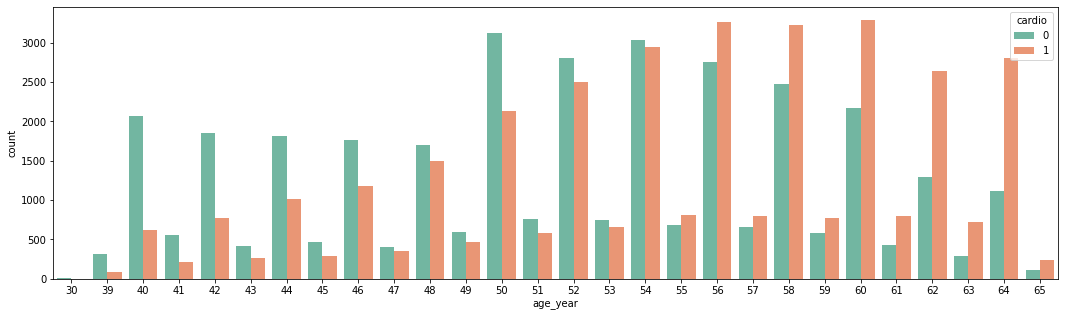

In [40]:
plt.figure(figsize=(18,5))

df['age_year'] = df['age_year'].astype('int') # convertimos a int para evitar el .0 de la edad en el gráfico

sns.countplot(x='age_year', hue='cardio', data=df, palette="Set2")

Se observa que las personas mayores de 55 años se encuentran más expuestas al CVD.
En la tabla podemos ver que existen _outliers_ en `ap_hi`, `ap_lo`, `weight` y `height`. Trabajaremos con esas observaciones mas adelante.

##### Agrupamientos

In [41]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [44]:
# df.groupby(['gender','active']).sum()
# df.groupby(['active']).sum()
df.groupby(['gender','active']).agg({'height':'mean', 'smoke':'sum'}).reset_index()

,gender,active,height,smoke
0,1,0,161.67,164
1,1,1,161.28,649
2,2,0,169.82,843
3,2,1,169.98,4513


In [46]:
df.groupby(['gender','active']).agg(
    **{
        'Smoke Sum': ('smoke', 'sum'),
        'Height mean': ('height', 'mean')
    }).reset_index()

,gender,active,Smoke Sum,Height mean
0,1,0,164,161.67
1,1,1,649,161.28
2,2,0,843,169.82
3,2,1,4513,169.98


In [104]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69993    19699
69994    21074
69995    19240
69998    22431
69999    20540
Name: age, Length: 60142, dtype: int64

In [53]:
# Agrupamientos en bins o 'porotos' de la columna

porotos = [-np.inf, 100, 130, 150, 180, np.inf]

# Las etiquetas tienen que ser una menos que los bins
etiquetas = ["0-100", "100-130", "130-150", "150-180", "más de 180"]

# Generamos range height, que tiene las labels de los grupos para cada observación
df["range height"] = pd.cut(
    df["height"], labels=etiquetas, bins=porotos, include_lowest=True
)

# No generamos un nuevo dataframe, sólo mostramos lo que podemos hacer con groupby y los bins
df.groupby(["range height", "gender", "active"])["height"].count().reset_index()


,range height,gender,active,height
0,0-100,1,0,5
1,0-100,1,1,16
2,0-100,2,0,3
3,0-100,2,1,8
4,100-130,1,0,12
5,100-130,1,1,32
6,100-130,2,0,7
7,100-130,2,1,21
8,130-150,1,0,435
9,130-150,1,1,1947


#### Analisis bivariado

Es útil mostrar las variables categóricas según el valor de la _clase objetivo_. 

Necesitamos cambiar la forma del dataframe. De "ancho" a "largo" ([tidy data](https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9)). Para eso utilizamos _pd.melt_ de pandas. Vamos a pasar de 70.000 registros a 140.000

In [54]:
df_long = pd.melt(df, id_vars=['cardio'], 
                  value_vars=['cholesterol_new','gluc_new'])
df_long

,cardio,variable,value
0,0,cholesterol_new,1
1,1,cholesterol_new,3
2,1,cholesterol_new,3
3,1,cholesterol_new,1
4,0,cholesterol_new,1
...,...,...,...
139995,0,gluc_new,1
139996,1,gluc_new,2
139997,1,gluc_new,1
139998,1,gluc_new,2


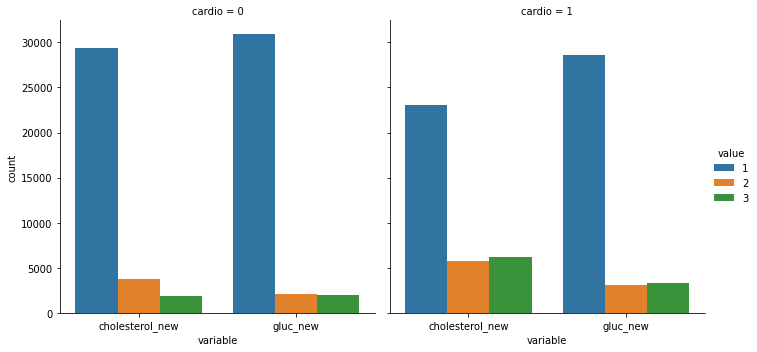

In [55]:
sns.catplot(x='variable', 
            hue="value", 
            col="cardio",
            data=df_long, 
            kind="count");

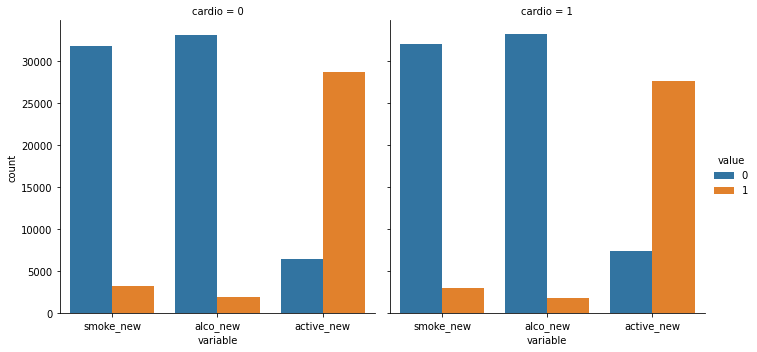

In [56]:
df_long = pd.melt(df, id_vars=['cardio'], 
                  value_vars=['smoke_new', 'alco_new', 'active_new'])

sns.catplot(x='variable', 
            hue="value", 
            col="cardio",
            data=df_long, 
            kind="count");

Es claro que los pacientes con CVD tiene niveles mayores de colesterol y glucosa en sangre. Y en términos generales, con menos actividad física.

Para poder saber si el valor "1" se refiere a mujeres o hombres (en la columna `gender`), vamos a calcular la media de la altura por sexo. Suponemos que los hombres, en promedio, son mas altos que las mujeres.

In [57]:
df.groupby('gender')['height'].mean()

gender
1   161.36
2   169.95
Name: height, dtype: float64

El promedio para el valor "2" es mayor que el de "1". Por lo tanto, "1" representa a las mujeres.

Veamos como se distribuyen en el dataset:

In [58]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Reemplazamos, en la función desarrollada mas arriba, el código de `gender` por `male` y `female`.

In [ ]:
col_gen = ['gender']
dict_gen = {1:'Female', 2:'Male'}

replace_dict(col_gen,dict_gen)

Quién consume mas frecuentemente alcohol? Mujeres u hombres?

In [59]:
df.groupby('gender')['alco'].sum().reset_index()

,gender,alco
0,1,1161
1,2,2603


Por lo tanto, los hombres consumen en promedio alcohol de manera mas frecuente que las mujeres.

Ahora, obtenemos las participaciones relativas:

In [63]:
df['cardio'].value_counts(normalize=True)

0   0.50
1   0.50
Name: cardio, dtype: float64

Para obtener como se distribuye la _clase objetivo_ entre hombres y mujeres, también se puede utilizar `crosstab`

In [64]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.33,0.17
1,0.32,0.18


### Cleaning Data / Limpieza de la base

La base contiene filas con `NA`s o `missing values`?

In [65]:
df.isnull().values.any() # NAs en todo el dataset
df['cholesterol'].isnull().sum() # NAs en la columna cholesterol

0

In [66]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,cholesterol_new,gluc_new,smoke_new,alco_new,active_new,cardio_new
count,"70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00"
mean,"49,972.42","19,468.87",1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50,53.34,1.37,1.23,0.09,0.05,0.80,0.50
std,"28,851.30","2,467.25",0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50,6.77,0.68,0.57,0.28,0.23,0.40,0.50
min,0.00,"10,798.00",1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,"25,006.75","17,664.00",1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,48.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,"50,001.50","19,703.00",1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,54.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,"74,889.25","21,327.00",2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00,58.00,2.00,1.00,0.00,0.00,1.00,1.00
max,"99,999.00","23,713.00",2.00,250.00,200.00,"16,020.00","11,000.00",3.00,3.00,1.00,1.00,1.00,1.00,65.00,3.00,3.00,1.00,1.00,1.00,1.00


Si observamos detenidamente las columnas `height` y `weight`, notamos que la altura mínima es de 55cm  y el peso mínimo es de 10kg. Podemos inferir que es un error, dado que la edad mínima es 29 años (10798 dias). 

Por otro lado, la altura máxima es 250cm y el peso máximo es 200kg, que sería irrelevante si generalizamos los datos.

Para lidiar con estos errores, borramos los _outliers_.

Vamos a borrar el peso y la altura que caen por debajo del 2.5% o por encima del 97.5% del rango de la base.

In [92]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

Además, en algunos casos la presión diastólica es mayor que la sistólica, que también es incorrecto. 
Cuanto registros son errados en términos de presión sanguinea?

In [93]:
print("La presión diastíloica es mayor que la sistólica en {0} casos".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

La presión diastíloica es mayor que la sistólica en 1082 casos


Vamos a borrar los outliers:

In [95]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

La presión diatólica es mayor que la sistólica en 0 casos


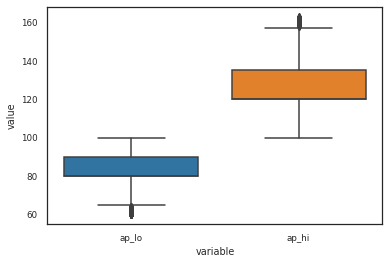

In [96]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("La presión diatólica es mayor que la sistólica en {0} casos".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

#### Análisis multivariado

Puede resultar de utilidad utilizar una matriz de correlación:

##### Heat map 

In [68]:
corr = df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,cholesterol_new,gluc_new,smoke_new,alco_new,active_new,cardio_new
id,1.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.00,0.00
age,0.00,1.00,-0.02,-0.08,0.05,0.02,0.02,0.15,0.10,-0.05,-0.03,-0.01,0.24,1.00,0.15,0.10,-0.05,-0.03,-0.01,0.24
gender,0.00,-0.02,1.00,0.50,0.16,0.01,0.02,-0.04,-0.02,0.34,0.17,0.01,0.01,-0.02,-0.04,-0.02,0.34,0.17,0.01,0.01
height,-0.00,-0.08,0.50,1.00,0.29,0.01,0.01,-0.05,-0.02,0.19,0.09,-0.01,-0.01,-0.08,-0.05,-0.02,0.19,0.09,-0.01,-0.01
weight,-0.00,0.05,0.16,0.29,1.00,0.03,0.04,0.14,0.11,0.07,0.07,-0.02,0.18,0.05,0.14,0.11,0.07,0.07,-0.02,0.18
ap_hi,0.00,0.02,0.01,0.01,0.03,1.00,0.02,0.02,0.01,-0.00,0.00,-0.00,0.05,0.02,0.02,0.01,-0.00,0.00,-0.00,0.05
ap_lo,-0.00,0.02,0.02,0.01,0.04,0.02,1.00,0.02,0.01,0.01,0.01,0.00,0.07,0.02,0.02,0.01,0.01,0.01,0.00,0.07
cholesterol,0.01,0.15,-0.04,-0.05,0.14,0.02,0.02,1.00,0.45,0.01,0.04,0.01,0.22,0.15,1.00,0.45,0.01,0.04,0.01,0.22
gluc,0.00,0.10,-0.02,-0.02,0.11,0.01,0.01,0.45,1.00,-0.00,0.01,-0.01,0.09,0.10,0.45,1.00,-0.00,0.01,-0.01,0.09
smoke,-0.00,-0.05,0.34,0.19,0.07,-0.00,0.01,0.01,-0.00,1.00,0.34,0.03,-0.02,-0.05,0.01,-0.00,1.00,0.34,0.03,-0.02


/tmp/ipykernel_397731/1916048626.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


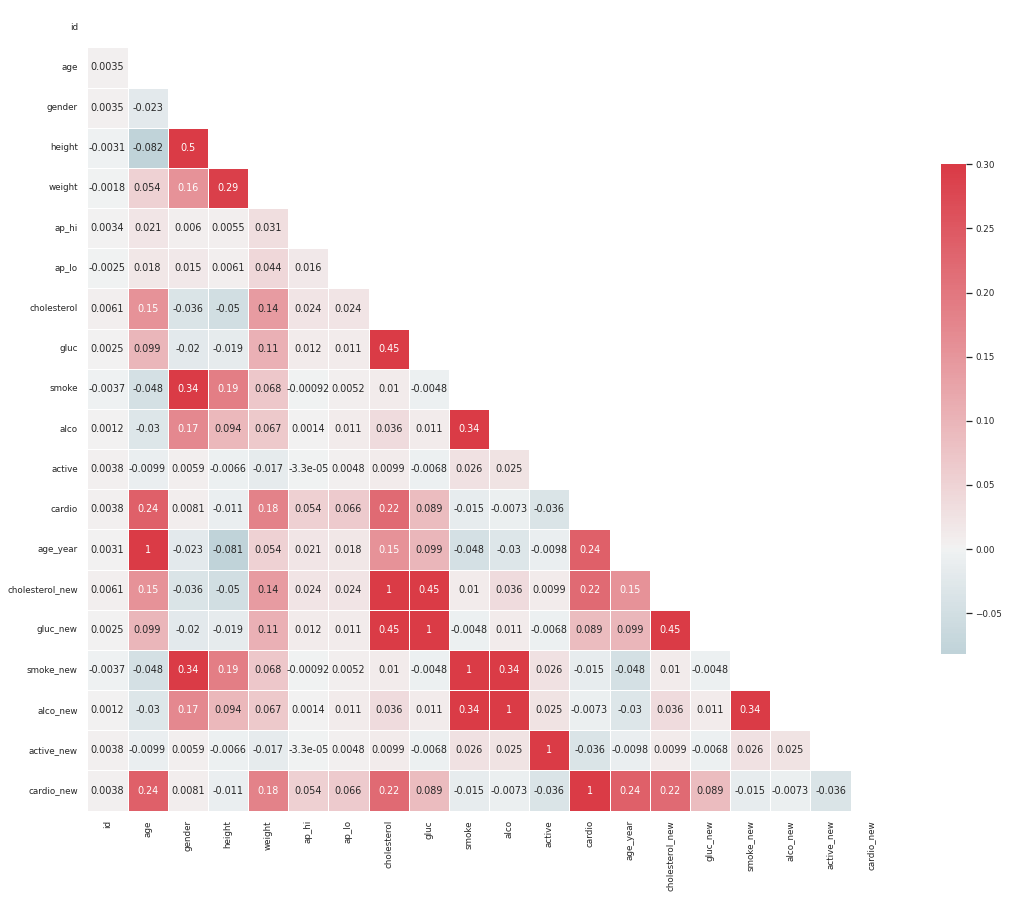

In [97]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Como podemos observar, `age` y `cholesterol` tienen un impacto significativo, pero no están altamente correlacionados con la _clase objetivo_

##### Violin plot 

Vamos a crear un `violinplot` para mostrar la distribución de la altura en los diferentes sexos. 

Tomando sólo el valor medio de la altura y el peso para cada valor de la variable `gender` puede no ser suficiente para determinar si '1' equivale a hombre o mujer.

In [71]:
import warnings
# warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
df_melt

,gender,variable,value
0,2,height,168.00
1,1,height,156.00
2,1,height,165.00
3,2,height,169.00
4,1,height,156.00
...,...,...,...
69995,2,height,168.00
69996,1,height,158.00
69997,2,height,183.00
69998,1,height,163.00


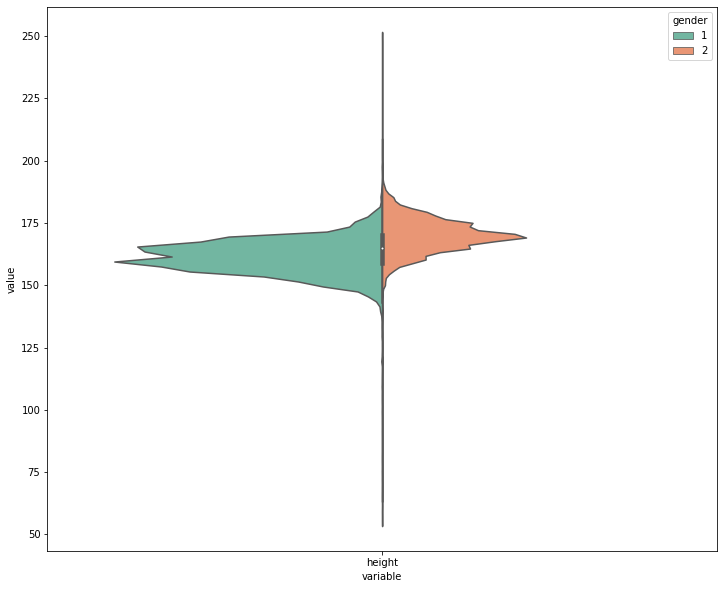

In [79]:
plt.figure(figsize=(12, 10))
sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    palette="Set2");

##### Catplot 

Vamos a crear una nueva variable: Body Mass Index (BMI) ó índice de masa muscular.

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

y comparamos el promedio de BMI para las personas sanas con el promedio de BMI para personas enfermas.

(los valores normales de BMI se encuentran en 18.5 y 25)

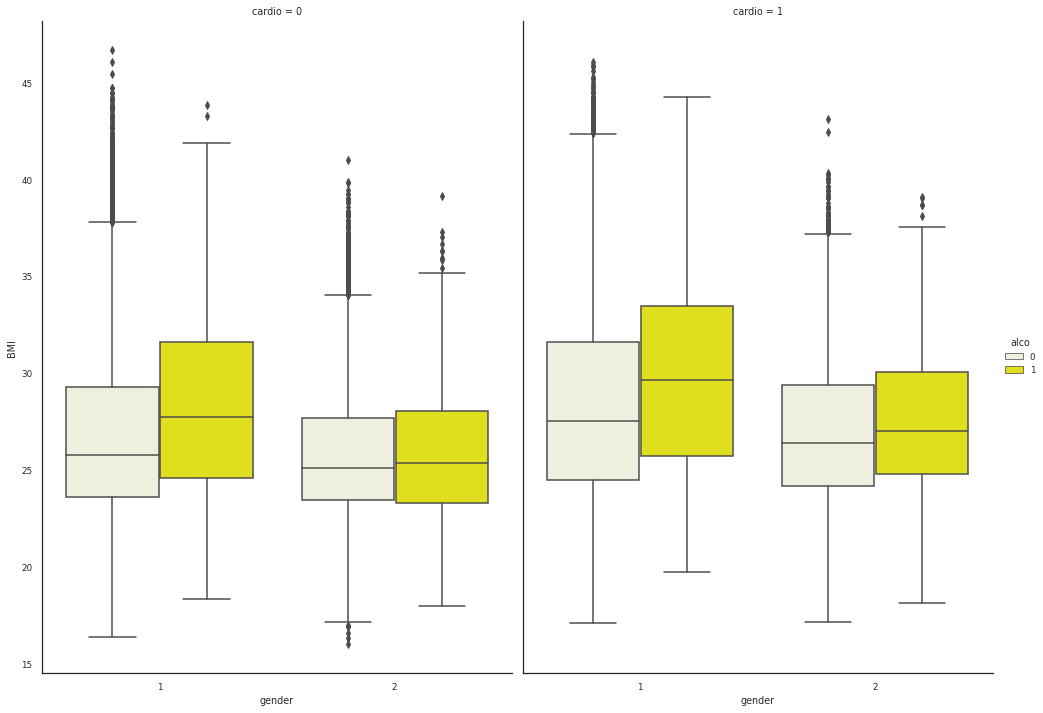

In [98]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)

# Vamos a mostrar geneo, bmi, alco y cardio en un sólo gráfico

sns.catplot(x="gender", y="BMI", 
            hue="alco", 
            col="cardio", 
            data=df, 
            color = "yellow",
            kind="box", 
            height=10, 
            aspect=.7);


Las mujeres que beben alcohol tienen un mayor riesgo de CVD que los hombres que consumen alochol, según su BMI.

##### Relplot 

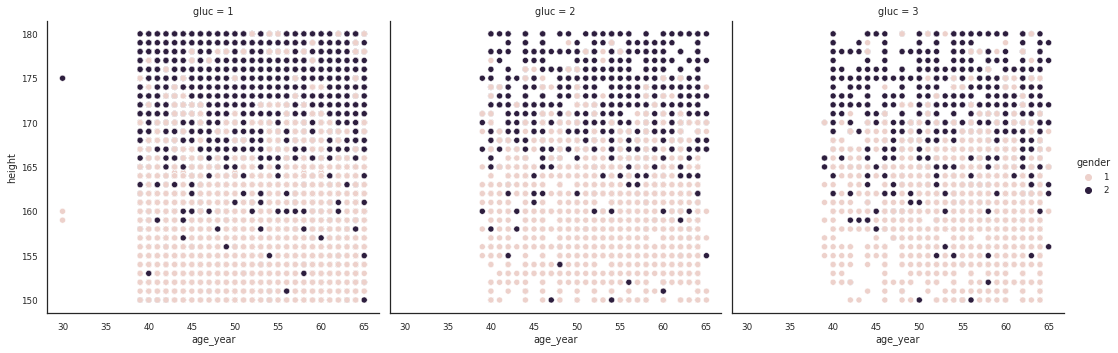

In [99]:
sns.relplot(x='age_year', y='height', col='gluc', hue='gender', 
            data=df);


In [101]:
df.shape

(60142, 22)

##### Pairplot 

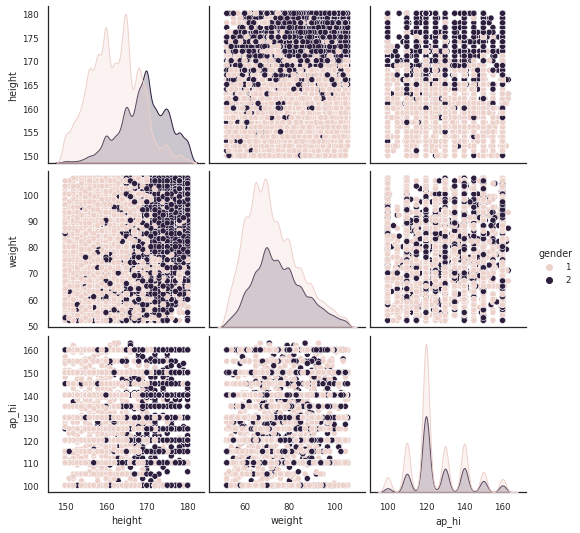

In [100]:
sns.pairplot(df, 
             hue='gender', 
             vars=['height', 'weight', 'ap_hi'], 
#              palette='inferno_r'
            );
# sns.despine(left=True, right = True)


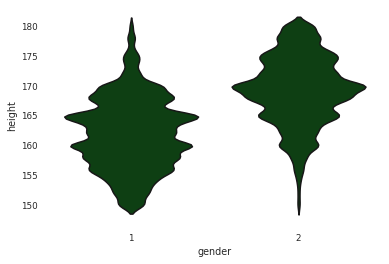

In [102]:
#  notebook, paper, poster
sns.set_context('notebook', font_scale=0.8)
sns.set_style('white') # darkgrid, whitegrid, dark, white, y ticks.

sns.violinplot(x=df['gender'], y=df['height'],
               scale='width', inner=None, color='xkcd:forest green'
              );

sns.despine(left=True, bottom = True)


